In [ ]:
Simple Linear Regression
Dataset - tvmarketing.csv
Forecast Sales based on 'TV' marketing budget. You need to build a linear 
regression model to predict 'Sales' using 'TV' as the predictor variable.
1. Import dataset and display first 5 rows
2. Check column data types
3. Check the shape of the Data Frame (rows, columns)
4. Look at summary statistics
5. Visualize the relationship between the features and the dependent variable 
using scatterplots
6. Prepare X (feature variables) and y (response variable)
7. Split Data into Training and Testing Sets (70%-Train 30%-Test) - X_train, 
y_train, X_test, y_test
8. Print the shape of train data and test data
9. Perform Linear Regression (on train data) without using any library and 
print the coefficients values
10.Create the model using the calculated coefficients and make predictions on 
the testing set
11.Perform Linear Regression using library(sklearn)
12.Print the intercept and coefficients
13.Make predictions on the testing set - y_pred
14.Plot train data and the model
15.Plot test data and the model
16.Print Mean Squared Error and R Squared Value
17.Calculate and print R Squared and Adjusted R Squared values without any 
librar

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [27]:
df = pd.read_csv("tvmarketing.csv")
print("First 5 rows:\n", df.head())

First 5 rows:
       TV  Sales
0  230.1   22.1
1   44.5   10.4
2   17.2    9.3
3  151.5   18.5
4  180.8   12.9


In [3]:
# Step 2: Column data types
print("\nColumn Data Types:\n", df.dtypes)


Column Data Types:
 TV       float64
Sales    float64
dtype: object


In [4]:
# Step 3: Shape of DataFrame
print("\nShape of the DataFrame:", df.shape)



Shape of the DataFrame: (200, 2)


In [5]:
# Step 4: Summary statistics
print("\nSummary Statistics:\n", df.describe())



Summary Statistics:
                TV       Sales
count  200.000000  200.000000
mean   147.042500   14.022500
std     85.854236    5.217457
min      0.700000    1.600000
25%     74.375000   10.375000
50%    149.750000   12.900000
75%    218.825000   17.400000
max    296.400000   27.000000


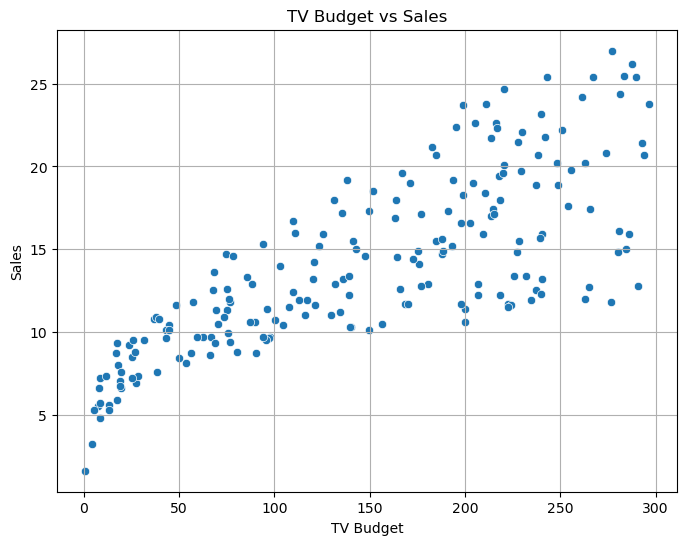

In [13]:
#5 Visualize the relationship between the features and the dependent variable 
# using scatterplots

plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x="TV", y="Sales")
plt.title("TV Budget vs Sales")
plt.xlabel("TV Budget")
plt.ylabel("Sales")
plt.grid(True)
plt.show()

In [20]:
# Step 6: Feature and Target
X = df[['TV']]
y = df['Sales']

In [23]:
# Step 7: Train-Test Split (70-30)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [25]:
# Step 8: Print Shapes
print("\nTrain shapes:", X_train.shape, y_train.shape)
print("Test shapes:", X_test.shape, y_test.shape)`


Train shapes: (140, 1) (140,)
Test shapes: (60, 1) (60,)


In [26]:
# Step 9: Manual Linear Regression (on train data)
x_mean = X_train['TV'].mean()
y_mean = y_train.mean()
numerator = ((X_train['TV'] - x_mean) * (y_train - y_mean)).sum()
denominator = ((X_train['TV'] - x_mean) ** 2).sum()
slope = numerator / denominator
intercept = y_mean - (slope * x_mean)

print("\nManual Linear Regression Coefficients:")
print(f"Intercept: {intercept:.4f}")
print(f"Slope: {slope:.4f}")



Manual Linear Regression Coefficients:
Intercept: 7.2395
Slope: 0.0464


In [31]:
# Step 10: Make predictions using manual model
y_pred_manual = slope * X_test['TV'] + intercept

In [32]:
# Step 11: Linear Regression using sklearn
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [33]:
# Step 12: Intercept and Coefficients
print("\nLinear Regression using sklearn:")
print("Intercept:", model.intercept_)
print("Coefficient:", model.coef_[0])


Linear Regression using sklearn:
Intercept: 7.23945983075114
Coefficient: 0.04640780212815275


In [34]:
# Step 13: Predictions using sklearn
y_pred = model.predict(X_test)


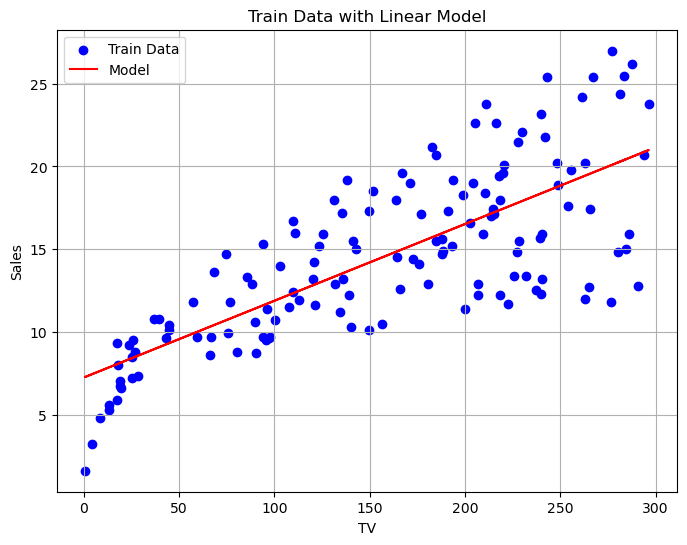

In [35]:
# Step 14: Plot Train data and model
plt.figure(figsize=(8, 6))
plt.scatter(X_train, y_train, color="blue", label="Train Data")
plt.plot(X_train, model.predict(X_train), color="red", label="Model")
plt.title("Train Data with Linear Model")
plt.xlabel("TV")
plt.ylabel("Sales")
plt.legend()
plt.grid(True)
plt.show()

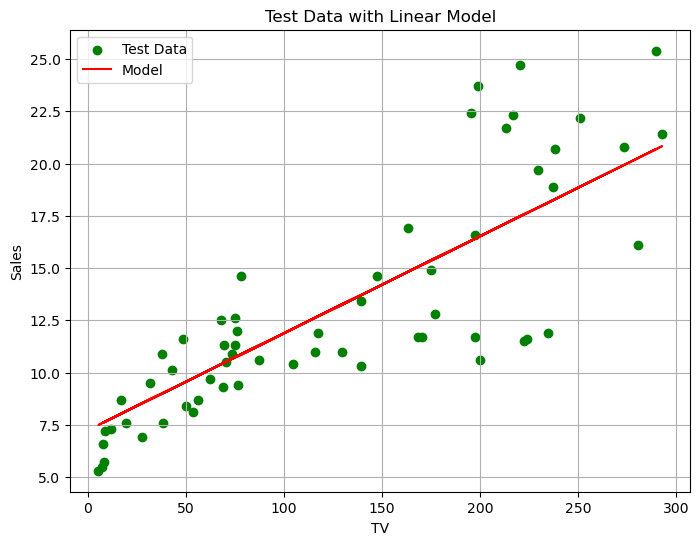

In [36]:
# Step 15: Plot Test data and model
plt.figure(figsize=(8, 6))
plt.scatter(X_test, y_test, color="green", label="Test Data")
plt.plot(X_test, y_pred, color="red", label="Model")
plt.title("Test Data with Linear Model")
plt.xlabel("TV")
plt.ylabel("Sales")
plt.legend()
plt.grid(True)
plt.show()

In [37]:
# Step 16: MSE and R^2
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("\nMean Squared Error:", mse)
print("R Squared:", r2)


Mean Squared Error: 8.970991242413616
R Squared: 0.6714477229302764


In [38]:
# Step 17: Manual R² and Adjusted R²
ss_total = ((y_test - y_test.mean())**2).sum()
ss_res = ((y_test - y_pred_manual)**2).sum()
r2_manual = 1 - (ss_res / ss_total)
n = len(y_test)
k = 1  # number of predictors
adjusted_r2 = 1 - ((1 - r2_manual) * (n - 1)) / (n - k - 1)

print("\nManual R Squared:", r2_manual)
print("Adjusted R Squared:", adjusted_r2)


Manual R Squared: 0.6714477229302767
Adjusted R Squared: 0.66578302849804
